In [56]:
import numpy as np

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward_propagation(self, X):
        activation = X
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activation) + b
            activation = self.sigmoid(z)
        return activation

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def backpropagation(self, X, y):
        m = X.shape[1]
        delta_weights = [np.zeros(w.shape) for w in self.weights]
        delta_biases = [np.zeros(b.shape) for b in self.biases]
        # Forward propagation
        activation = X
        activations = [activation]
        zs = []
        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activation) + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)

        # Backpropagation
        delta = (activations[-1] - y) * self.sigmoid_derivative(zs[-1])
        delta_weights[-1] = np.dot(delta, activations[-2].T)
        delta_biases[-1] = np.sum(delta, axis=1, keepdims=True)
        for l in range(2, len(self.layer_sizes)):
            delta = np.dot(self.weights[-l+1].T, delta) * self.sigmoid_derivative(zs[-l])
            delta_weights[-l] = np.dot(delta, activations[-l-1].T)
            delta_biases[-l] = np.sum(delta, axis=1, keepdims=True)

        return delta_weights, delta_biases

    def train(self, X, y, num_epochs, learning_rate):
        m = X.shape[1]
        for epoch in range(num_epochs):
            delta_weights, delta_biases = self.backpropagation(X, y)
            self.weights = [w - (learning_rate / m) * dw for w, dw in zip(self.weights, delta_weights)]
            self.biases = [b - (learning_rate / m) * db for b, db in zip(self.biases, delta_biases)]

    def predict(self, X):
        return self.forward_propagation(X)


In [57]:
if __name__ == '__main__':
    layer_sizes = [2, 4, 1]  # Input layer: 2 neurons, Hidden layer: 4 neurons, Output layer: 1 neuron
    nn = NeuralNetwork(layer_sizes)

    # Training data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
    y = np.array([[0, 1, 1, 0]])

    # Train the neural network
    num_epochs = 10000
    learning_rate = 0.1
    nn.train(X, y, num_epochs, learning_rate)
    
    predictions = nn.predict(X)
    print("Predictions:")
    print(predictions)


Predictions:
[[0.23317429 0.62300796 0.69296428 0.49537369]]


In [58]:
X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [59]:
X[0]

array([0, 0, 1, 1])

In [60]:
y[0]

array([0, 1, 1, 0])

In [61]:
x = [(x, y) for x, y in zip(X[:,0], X[:,1])]
x

[(0, 0), (0, 1)]

In [62]:
x0 = [i for i in X[0] if i == 0]
x1 = [i for i in X[1] if i == 1]

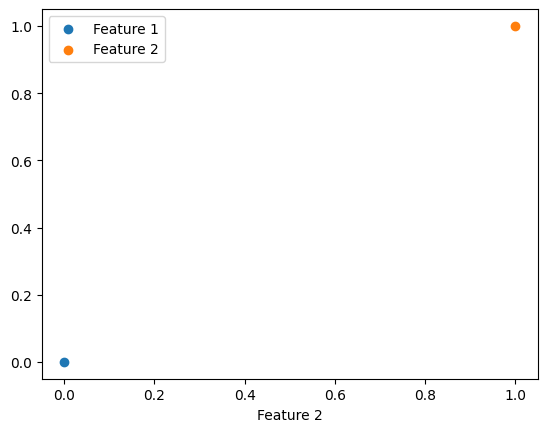

In [63]:
import matplotlib.pyplot as plt
plt.scatter(x0[0], x0[1], label="Feature 1")
plt.scatter(x1[0], x1[1], label="Feature 2")
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.legend()
plt.show()

In [64]:
final_preditions = [1 if predict >= 0.5 else 0 for predict in predictions[0]]

In [65]:
final_preditions

[0, 1, 1, 0]